# Заревич Михаил 513-2
Вариант 179

Нулевая гипотеза - случайная величина имеет равномерное распределение.

## Анализ выборки.

Документация на критерий Колмогорова-Смирнова - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

ks_1samp - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html

ks_2samp - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

Хи-квадрат https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_chisquare.html#hypothesis-chisquare

In [ ]:
import pandas as pd
import itertools
import scipy.stats
import math
import matplotlib.pyplot as plt

In [ ]:
# Уровни значимости Significance level
alphas = [0.005, 0.01, 0.05]

# Соответствующие им доверительные вероятноси Confidence level
gammas = [0.995, 0.99, 0.95]


In [ ]:
# по умолчанию первая строчка csv файла записывается в заголовок колонки
# чтобы этого не было надо написать header = None
df = pd.read_csv("/content/v179.csv", header =None)

df = df.sort_values(by = [0]).reset_index()
df = df.rename(columns={0: "Значения"})
df


,index,Значения
0,931091,0.000484
1,957279,0.000634
2,956749,0.000760
3,838583,0.000817
4,415552,0.000873
...,...,...
999995,273361,224.998505
999996,321157,224.998745
999997,76407,224.999332
999998,48804,224.999436


In [ ]:
# Значения разбросаны в диапазоне от 0 до 225.
# Диапазон можно разделить на 15 интервалов и посмотреть, сколько значений будет в каждом из них.
bins = pd.cut(df["Значения"], 15)
bins

,Значения
0,"(-0.225, 15.0]"
1,"(-0.225, 15.0]"
2,"(-0.225, 15.0]"
3,"(-0.225, 15.0]"
4,"(-0.225, 15.0]"
...,...
999995,"(210.0, 225.0]"
999996,"(210.0, 225.0]"
999997,"(210.0, 225.0]"
999998,"(210.0, 225.0]"


In [ ]:
df["Интервалы"] = bins
df

,index,Значения,Интервалы
0,931091,0.000484,"(-0.225, 15.0]"
1,957279,0.000634,"(-0.225, 15.0]"
2,956749,0.000760,"(-0.225, 15.0]"
3,838583,0.000817,"(-0.225, 15.0]"
4,415552,0.000873,"(-0.225, 15.0]"
...,...,...,...
999995,273361,224.998505,"(210.0, 225.0]"
999996,321157,224.998745,"(210.0, 225.0]"
999997,76407,224.999332,"(210.0, 225.0]"
999998,48804,224.999436,"(210.0, 225.0]"


In [ ]:
# Группировка значений по интервалам.
temp = df.groupby('Интервалы')

# Группированный статистический ряд абсолютных частот.
Series = temp.agg({'Интервалы': 'count'})

print(Series)


                Интервалы
Интервалы                
(-0.225, 15.0]      66641
(15.0, 30.0]        66524
(30.0, 45.0]        66648
(45.0, 60.0]        66438
(60.0, 75.0]        66861
(75.0, 90.0]        66501
(90.0, 105.0]       66581
(105.0, 120.0]      66594
(120.0, 135.0]      67119
(135.0, 150.0]      66884
(150.0, 165.0]      66627
(165.0, 180.0]      66210
(180.0, 195.0]      66918
(195.0, 210.0]      66796
(210.0, 225.0]      66658


<ipython-input-110-d383092dd0ef>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby('Интервалы')


In [ ]:
# Группированный статистический ряд абсолютных частот.
Series = Series.rename(columns={"Интервалы": "Количество значений, попавших в интервал"})
temp = df['Интервалы'].unique()
Series["Интервалы"] = temp

Series

,"Количество значений, попавших в интервал",Интервалы
Интервалы,,
"(-0.225, 15.0]",66641,"(-0.225, 15.0]"
"(15.0, 30.0]",66524,"(15.0, 30.0]"
"(30.0, 45.0]",66648,"(30.0, 45.0]"
"(45.0, 60.0]",66438,"(45.0, 60.0]"
"(60.0, 75.0]",66861,"(60.0, 75.0]"
"(75.0, 90.0]",66501,"(75.0, 90.0]"
"(90.0, 105.0]",66581,"(90.0, 105.0]"
"(105.0, 120.0]",66594,"(105.0, 120.0]"
"(120.0, 135.0]",67119,"(120.0, 135.0]"


<Axes: xlabel='Интервалы', ylabel='Количество значений, попавших в интервал'>

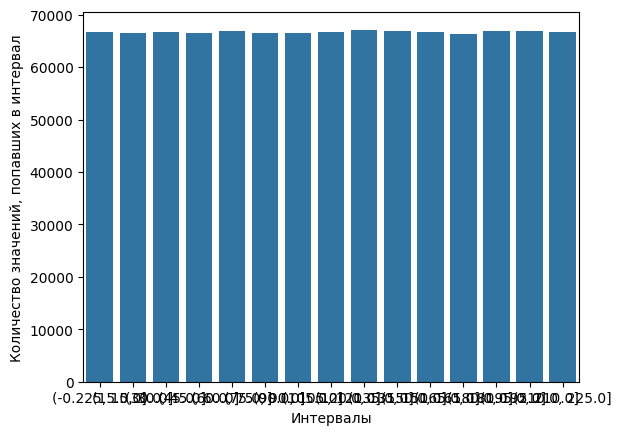

In [ ]:
import seaborn as sns

x = Series["Интервалы"]
y = Series["Количество значений, попавших в интервал"]
sns.barplot(x=x, y=y)


In [ ]:
print("Выборочное математическое ожидание: ", df["Значения"].mean())
print("Выборочная дисперсия: ", df["Значения"].var())
print("Выборочное ско: ", df["Значения"].std())
print("Выборочный коэффициент ассиметрии: ", df["Значения"].skew())
print("Выборочный эксцесс: ", df["Значения"].kurtosis())

Выборочное математическое ожидание:  112.54522244714907
Выборочная дисперсия:  4217.309397054735
Выборочное ско:  64.94081457030498
Выборочный коэффициент ассиметрии:  -0.0006452204336080178
Выборочный эксцесс:  -1.199501656540624


**Вывод.**

На основании вида графика можно выдвинуть гипотезу - случайная величина имеет равномерное распределение.

## Проверка гипотезы по критерию Колмогорова-Смирнова.


Этот критерий предназначен для проверки гипотез о
принадлежности анализируемой выборки некоторому известному закону
распределения.


Используем one-sample test.

This test compares the underlying distribution F(x) of a sample against a given continuous distribution G(x).

In [ ]:
# Сравнивает функцию распределения выборки, стоящую на первом месте с теоретической функцией распределения, стоящей на втором месте.
# Нужно использовать df["Значения"].
# Series["Количество значений, попавших в интервал."] тут не подойдёт, так как это плотность распределения.
# вместо "uniform" можно написать scipy.stats.uniform.cdf
# args() содержит параметры распределения.
# в случае равномерного распределения первый параметр - это нижняя граница, второй - расстояние до верхней границы.
# в документации про это не написано.
# По умолчанию равномерное распределение будет с параметрами (0, 1). Можно и задать и другие значения.
# У меня в df["Значения"] значения от 0 до 225, нужно поставить их
# либо отнормировать в диапазон (0, 1) используя temp = df[0]/225, тогда args можно не писать.
# Значения pvalue будут одинаковыми

# Если, например, распределение будет U(25, 250), то будет args=(25, 225)


KSTest1 = scipy.stats.kstest(df["Значения"] , "uniform", args=(0, 225))

temp = df["Значения"]/225
KSTest2 = scipy.stats.kstest(temp , "uniform")


print(KSTest1)
print(KSTest2)

KstestResult(statistic=np.float64(0.0006821141977043643), pvalue=np.float64(0.7404943954902541), statistic_location=np.float64(111.04405069448347), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.0006821141977043643), pvalue=np.float64(0.7404943954902541), statistic_location=np.float64(0.49352911419770434), statistic_sign=np.int8(-1))


**Вывод.**


Чтобы понять результат проверки гипотезы, нужно обратить внимание на парамер pvalue.


Из документации:
We choose a confidence level of 95%; that is, we will reject the null hypothesis in favor of the alternative if the p-value is less than 0.05.


Т.е. нулевая гипотеза отвергается, если pvalue меньше заданного уровня значимости, и принимается - если больше.

Максимальное значение уровня значимости у нас - 0,05. Pvalue больше него, значит при всех уровнях значимости нулевую гипотезу можно принять.


## Проверка гипотезы по критерию хи квадрат.

The chi-square test tests the null hypothesis that a given set of categorical data has the given frequencies.

Параметры функции.
```
f_obs = array_like. Observed frequencies in each category.
f_exp = array_like, optional. Expected frequencies in each category.
Не поддерживает callable. Т.е. тут нельзя написать scipy.stats.uniform
chisquare(f_obs, f_exp=None ...)
```












1 вариант.

Из документации: f_exp - Expected frequencies in each category. By default, the categories are assumed to be equally likely.

Т.е. если не задавать этот параметр, наша выборка будет сравниваться с равномерным распределением.

In [ ]:
print(scipy.stats.chisquare(Series["Количество значений, попавших в интервал"]))

Power_divergenceResult(statistic=np.float64(10.401109999999997), pvalue=np.float64(0.7323092652628258))


**Вывод.**

Pvalue снова оказался больше каждого из уровней значимости, значит нулевую гипотезу можно принять при любом из них.

2 вариант.

Параметр f_exp можно задать вручную.

Мы хотим проверить, является ли распределение равномерным. Используя закон распределения равномерного распределения, составим предполагаемый статистический ряд абсолютных частот.


Series["Количество значений, попавших в интервал"] - это будут наши ni. Поскольку мы хотим проверить равномерное распределение, pi - вероятность попадания в каждый из 15 интервалов будет равна 1/15





In [ ]:
pi = 1/15
n = len(df)
temp = n*pi
ExpectedFrequencies = [temp for i in range(15)]
ExpectedFrequencies

[66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667,
 66666.66666666667]

In [ ]:
# сравниваем ряд ni с n*pi
print(scipy.stats.chisquare(Series["Количество значений, попавших в интервал"], ExpectedFrequencies))

Power_divergenceResult(statistic=np.float64(10.401109999999997), pvalue=np.float64(0.7323092652628258))


**Вывод.**

Значение pvalue получилось таким же, как и в первом варианте.
